In [1]:
import pandas as pd
import numpy as np

# 그래프
import matplotlib
import matplotlib.pyplot as plt

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [3]:
import matplotlib.font_manager as fm

# 한글 폰트
font_name = fm.FontProperties(fname='/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf').get_name()
plt.rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: '/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'

In [4]:
# data 불러오기
data = pd.read_csv("HMEQ.csv", engine = 'python')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


## 데이터 구성하기

In [5]:
# 결측치 처리
data.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [6]:
#  범주형 변수 누락값 처리: 최빈값 Other로 대체
data['JOB'].fillna("Other", inplace=True)

# 수치형 변수 누락값 처리: 평균으로 대체
data.fillna(data.mean(), inplace=True)

In [7]:
# x/y 분리
data_y = data[['BAD']]
data_x = data.drop('BAD', axis=1)

# 더미변수 생성
data_x = pd.get_dummies(data_x)
data_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [8]:
# 데이터 분할
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 1234)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(2623, 18)
(1125, 18)
(2623, 1)
(1125, 1)


## MLPClassifier  모델 생성

In [9]:
nn_uncustomized = MLPClassifier(random_state=1234)
# hidden_layer_sizes=(100, 100) 변경 - 은닉층 2개, 각 은닉층 노드 100개
nn_uncustomized.fit(train_x, train_y)

print("Accuracy on training ser: {:.3f}".format(nn_uncustomized.score(train_x, train_y)))
print("Accuracy on test ser: {:.3f}".format(nn_uncustomized.score(test_x, test_y)))

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training ser: 0.722
Accuracy on test ser: 0.683


In [10]:
nn_uncustomized

MLPClassifier(random_state=1234)

## MLPClassifier 모델 Param. 변경

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# hidden_layer_sizes: 은닉층 변경 (20, 40, ..., 160)
para_hidden = [20*hidden for hidden in range(1, 9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(train_x, train_y)
    
    train_accuracy.append(nn.score(train_x, train_y))
    test_accuracy.append(nn.score(test_x, test_y))
    
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [13]:
# 은닉층 별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.906,0.903
1,40,0.886,0.879
2,60,0.909,0.908
3,80,0.910,0.909
4,100,0.722,0.683
5,120,0.909,0.908
6,140,0.213,0.193
7,160,0.907,0.907


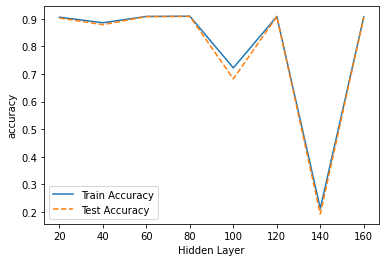

In [14]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(train_x, train_y)
    
    train_accuracy.append(nn.score(train_x, train_y))
    test_accuracy.append(nn.score(test_x, test_y))
    
df_accuracy_function= pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
# Activation Function 별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.722,0.683


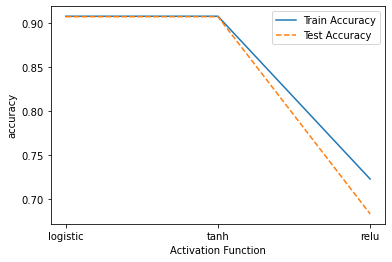

In [16]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

In [18]:
# 변수명 저장
v_feature_name = train_x.columns

# StandaerScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [19]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state=1234)

print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (2623, 18)
test data X size: (1125, 18)


In [20]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, train_y)))
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, test_y)))

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.971
Accuracy on test set: 0.943


/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [20 * hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))

#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pi

In [20]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.975,0.948
1,40,0.994,0.952
2,60,0.999,0.949
3,80,1.000,0.955
4,100,1.000,0.953
5,120,1.000,0.951
6,140,1.000,0.955
7,160,1.000,0.955
8,180,1.000,0.957
9,200,1.000,0.956


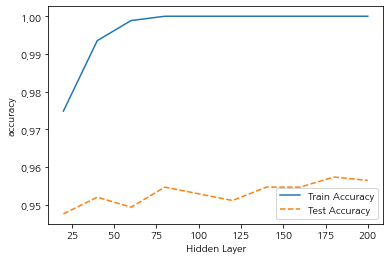

In [21]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Hidden Layer')
plt.legend()

In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))
    
df_accuracy_function= pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/pi

In [23]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.937,0.933
1,tanh,0.999,0.952
2,relu,1.000,0.955


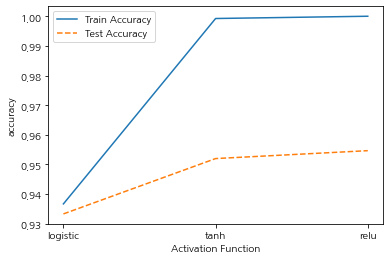

In [24]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Activation Function')
plt.legend()

In [25]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# solver 변경
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = 'relu', hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))
    
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return 

In [26]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


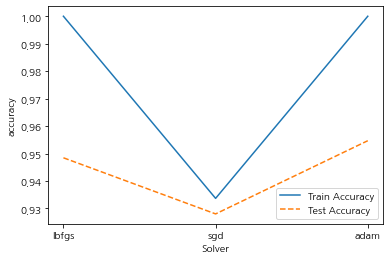

In [27]:
plt.plot(para_solver, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()

In [28]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# mini batch 변경
para_batch = [20*batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', activation = 'relu', hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, train_y)
    
    train_accuracy.append(nn.score(df_scaled_train_x, train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, test_y))
    
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch['Mini Batsh'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [29]:
df_accuracy_batch.round(3)

,Mini Batsh,TrainAccuracy,TestAccuracy
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


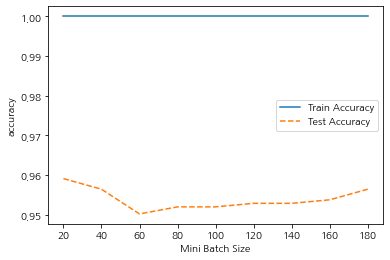

In [30]:
plt.plot(para_batch, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('Mini Batch Size')
plt.legend()

## 결론도출

In [34]:
nn_final = MLPClassifier(batch_size = 100, solver = 'adam', activation = 'relu', hidden_layer_sizes = (80, 80), random_state = 1234)
nn_final.fit(df_scaled_train_x, train_y)

y_pred = nn_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:3f}".format(nn_final.score(df_scaled_train_x, train_y)))
print("Accuracy on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, test_y)))

/home/piai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 1.000000
Accuracy on test set: 0.952


In [35]:
print("Confusion matrix: \n{}".format(confusion_matrix(test_y, y_pred)))

Confusion matrix: 
[[1018    3]
 [  51   53]]
